# Problema 4. Cálculo de $\sqrt{2}$

Utilizaremos el método de Newton y el método de la Secante para aproximar el valor de $\sqrt 2$, calculando la raíz positiva de la función
$$
f(x)=x^2-2.
$$

### 1. Método de Newton

In [13]:
from __future__ import division, print_function # Sólo para Python 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[a,b] = [0.000000,2.000000]


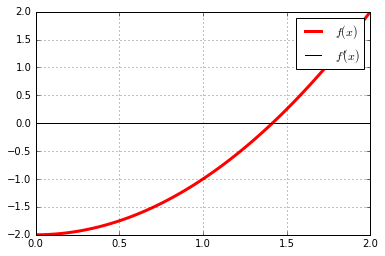

In [14]:
f = lambda x: x**2-2

# Mediante prueba y error, llegamos a este intervalo donde f cambia
# el signo pero f'>0 y 
a,b = 0, 2
print("[a,b] = [%f,%f]" % (a,b))

x = np.linspace(a, b,100)
plt.plot(x, f(x), c="red", linewidth=3)

plt.grid()
plt.axhline(c='k');
plt.legend([r"$f(x)$",r"$f'(x)$",r"$f''(x)$"])

Ahora programamos el método de Newton (es muy fácil si nos basamos en el programa de punto fijo visto en prácticas anteriores)

In [23]:
def newton(f, df, x0, tol=1e-10, maxiter=100):
    """Cálculo de una solución de $f(x)=0$ mediante el método de Newton.
    
    Argumentos:
        f: Función considerada
        df: Función derivada de f
        x0 : Estimación inicial
        tol: Tolerancia (diferencia entre dos iteraciones sucesivas)
        maxiter: Número máximo de iteraciones admitidas
    Valores devueltos: (x, niter) con
        x: Aproximación del punto fijo
        niter: Número de iteraciones realizadas
    """
    k = 0
    while k<maxiter:
        x1 = x0-f(x0)/df(x0) # Iteración de punto fijo
        if abs(x1-x0) < tol: break        
        x0 = x1 # Preparamos la siguiente iteración
        k = k+1
        
    # Si se llegó al número máximo de iteraciones, lanzar una excepción
    if k==maxiter: 
        raise ValueError("Error de convergencia!") 
        
    # Si todo fue bien, devolvemos la solución y el número de iteraciones
    return x1, k

In [24]:
x0 = 2 # Inicialización sugerida por la regla de Fourier
x, niter = newton(f,df,x0)
print("Aproximación de $\sqrt{2}$ por el m. de Newton:", x)
print("Número de iteraciones:", niter) 
print("Resíduo: |f(x)| = %1.16f" % abs(f(x)))

Aproximación de $\sqrt{2}$ por el m. de Newton: 1.41421356237
Número de iteraciones: 4
Resíduo: |f(x)| = 0.0000000000000004


### 2. Método de la Secante

El *método de la secante* se puede interpretar como una variante del método de Newton en el que aproximamos la derivada en $x_k$ por el cociente incremental $(f(x_k)-f(x_{k-1}))/(x_k-x_{k-1})$. Geométricamente, consiste en sustituir el cálculo de la tangente en $x_k$ por la secante que pasa por los puntos $(x_k, f(x_k))$ y $(x_{k-1},f(x_{k-1}))$.  

Supongamos que $f$ tiene una única solución en
$[a,b]$, siendo $f(a)f(b)<0$. Construimos una sucesión recursiva tal y como sigue:

- Como inicialización, fijamos, por ejemplo, $x_0=a$ y $x_1=b$.

- En la etapa $k+1$: Calculamos $x_{k+1}$ usando la expresión:
    $$
      x_{k+1} = x_k - f(x_k) \frac{x_k-x_{k-1}}{f(x_k)-f(x_{k-1})}
    $$


In [25]:
def secante(f, x0, x1, tol=1e-10, maxiter=100):
    """Cálculo de una solución de $f(x)=0$ mediante el método de la secante.
    
    Argumentos:
        f: Función considerada
        x0, x1 : Estimaciones iniciales
        tol: Tolerancia (diferencia entre dos iteraciones sucesivas)
        maxiter: Número máximo de iteraciones admitidas
    Valores devueltos: (x, niter) con
        x: Aproximación del punto fijo
        niter: Número de iteraciones realizadas
    """
    k = 0
    while k<maxiter:
        x = x1-f(x1)*(x1-x0)/(f(x1)-f(x0)) # Iteración de punto fijo
        if abs(x-x1) < tol: break        
        x0, x1 = x1, x # Preparamos la siguiente iteración
        k = k+1
        
    # Si se llegó al número máximo de iteraciones, lanzar una excepción
    if k==maxiter: 
        raise ValueError("Error de convergencia!") 
        
    # Si todo fue bien, devolvemos la solución y el número de iteraciones
    return x, k

In [26]:
x0, x1 = a, b
x, niter = secante(f,x0, x1)
print("Aproximación de $\sqrt{2}$ por el m. de la secante:", x)
print("Número de iteraciones:", niter) 
print("Resíduo: |f(x)| = %1.16f" % abs(f(x)))

Aproximación de $\sqrt{2}$ por el m. de la secante: 1.41421356237
Número de iteraciones: 7
Resíduo: |f(x)| = 0.0000000000000004
